In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Завантаження середовища
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array", new_step_api=True)

# Функція для відображення середовища
def show_render(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Функція обчислення функції цінності
def compute_value_function(policy, env, gamma=1.0, threshold=1e-10, max_iterations=1000):
    value_table = np.zeros(env.observation_space.n)

    for i in range(max_iterations):
        updated_value_table = np.copy(value_table)

        for state in range(env.observation_space.n):
            action = policy[state]
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state])
                                      for trans_prob, next_state, reward_prob, _ in env.P[state][action]])

        if np.sum(np.abs(updated_value_table - value_table)) <= threshold:
            print(f'Функція цінності збіглася на ітерації #{i+1}')
            break

    return value_table

In [ ]:
# Функція для витягування політики з функції цінності
def extract_policy(value_table, env, gamma=1.0):
    policy = np.zeros(env.observation_space.n)

    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)

        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += trans_prob * (reward_prob + gamma * value_table[next_state])

        policy[state] = np.argmax(Q_table)

    return policy

In [ ]:
# Функція ітерації за політиками
def policy_iteration(env, gamma=1.0):
    old_policy = np.zeros(env.observation_space.n)

    while True:
        new_value_function = compute_value_function(old_policy, env, gamma)
        new_policy = extract_policy(new_value_function, env, gamma)

        if np.all(old_policy == new_policy):
            print('Ітерація за політиками збіглася.')
            break

        old_policy = new_policy

    return new_policy, new_value_function


In [ ]:
# Запуск ітерації за політиками
optimal_policy, optimal_value_function = policy_iteration(env, gamma=1.0)

# Виведення результатів
print("Оптимальна функція цінності:", optimal_value_function)
print("Оптимальна політика:", optimal_policy)

Функція цінності збіглася на ітерації #1
Функція цінності збіглася на ітерації #45
Функція цінності збіглася на ітерації #252
Функція цінності збіглася на ітерації #272
Функція цінності збіглася на ітерації #638
Функція цінності збіглася на ітерації #701
Функція цінності збіглася на ітерації #879
Ітерація за політиками збіглася.
Оптимальна функція цінності: [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]
Оптимальна політика: [0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [ ]:
# Запуск ітерації за політиками
optimal_policy, optimal_value_function = policy_iteration(env, gamma=0.2)

# Виведення результатів
print("Оптимальна функція цінності:", optimal_value_function)
print("Оптимальна політика:", optimal_policy)

Функція цінності збіглася на ітерації #1
Функція цінності збіглася на ітерації #12
Функція цінності збіглася на ітерації #14
Функція цінності збіглася на ітерації #14
Функція цінності збіглася на ітерації #15
Функція цінності збіглася на ітерації #15
Ітерація за політиками збіглася.
Оптимальна функція цінності: [1.84500179e-06 8.47074338e-06 1.16745412e-04 8.98041589e-06
 1.73592888e-05 0.00000000e+00 1.62545535e-03 0.00000000e+00
 2.41185049e-04 3.35923141e-03 2.42650848e-02 0.00000000e+00
 0.00000000e+00 2.58822012e-02 3.58991586e-01 0.00000000e+00]
Оптимальна політика: [2. 3. 2. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [ ]:
# Запуск ітерації за політиками
optimal_policy, optimal_value_function = policy_iteration(env, gamma=0.9)

# Виведення результатів
print("Оптимальна функція цінності:", optimal_value_function)
print("Оптимальна політика:", optimal_policy)

Функція цінності збіглася на ітерації #1
Функція цінності збіглася на ітерації #37
Функція цінності збіглася на ітерації #111
Функція цінності збіглася на ітерації #116
Функція цінності збіглася на ітерації #155
Функція цінності збіглася на ітерації #159
Ітерація за політиками збіглася.
Оптимальна функція цінності: [0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
Оптимальна політика: [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


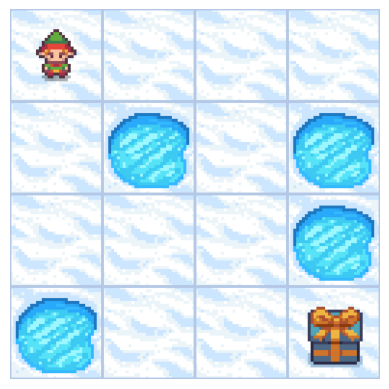

Стан: 0, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


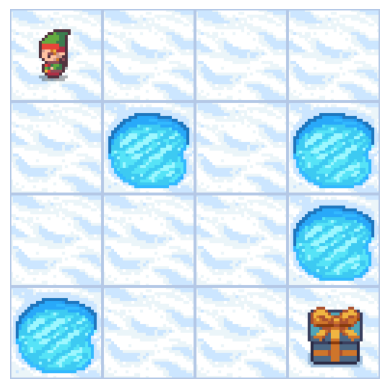

Стан: 0, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


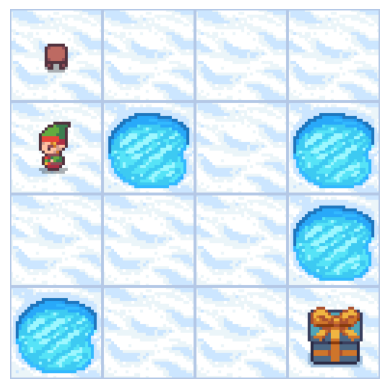

Стан: 4, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


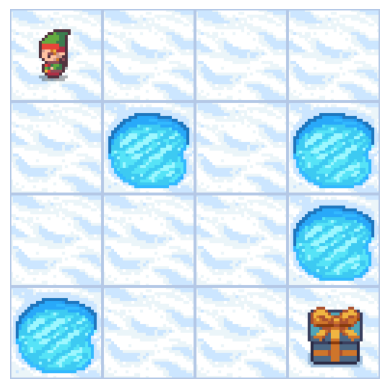

Стан: 0, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


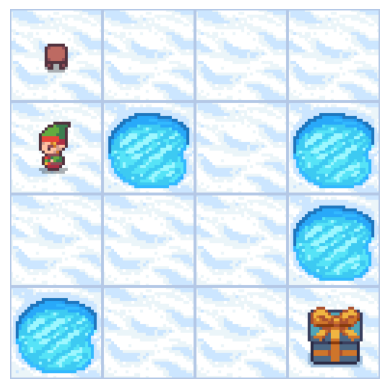

Стан: 4, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


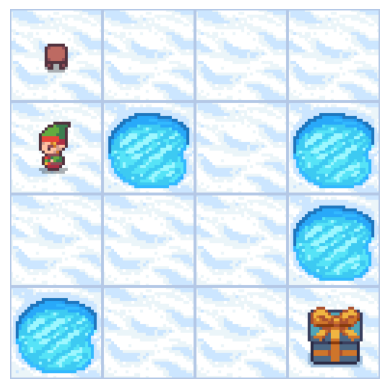

Стан: 4, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


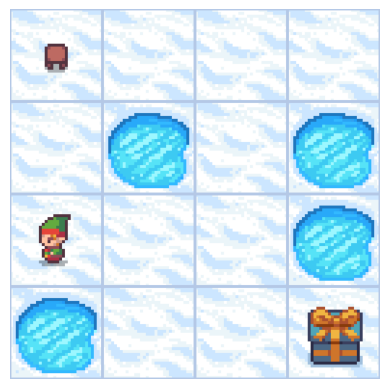

Стан: 8, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


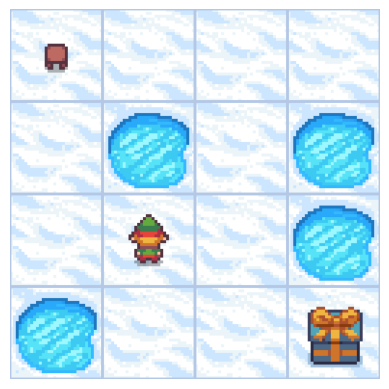

Стан: 9, Дія: 3, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


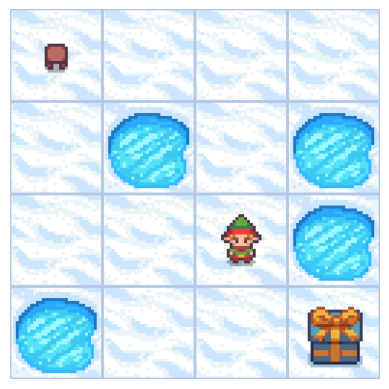

Стан: 10, Дія: 1, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


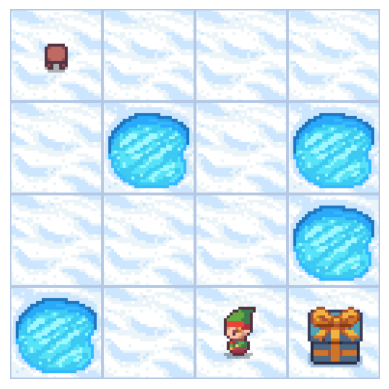

Стан: 14, Дія: 0, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


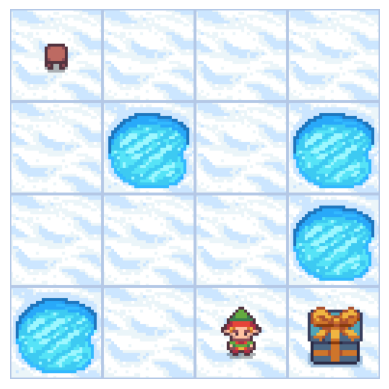

Стан: 14, Дія: 1, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


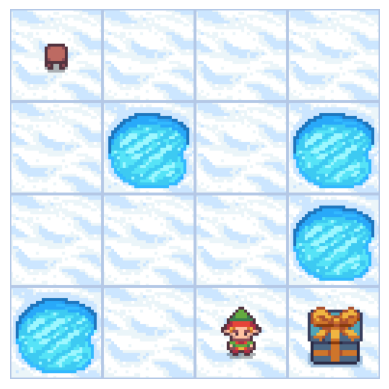

Стан: 14, Дія: 1, Винагорода: 0.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}


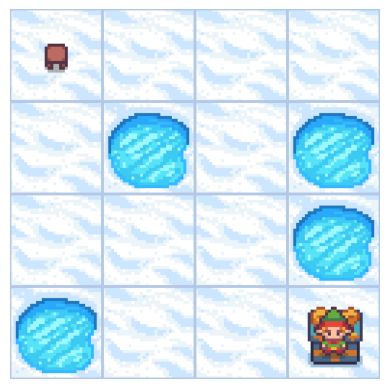

Стан: 15, Дія: 1, Винагорода: 1.0, Завершено: False, Інформація: {'prob': 0.3333333333333333}
Загальна винагорода за епізод: 1.0


In [ ]:
# Ініціалізація середовища та виконання дій згідно з оптимальною політикою
observation = env.reset()
done = False
total_reward = 0
step_count = 0  # Лічильник кроків
max_steps = len(optimal_policy)  # Встановлюємо max_steps на довжину оптимальної політики

while not done and step_count < max_steps:
    # Вибір дії згідно з оптимальною політикою
    action = int(optimal_policy[observation])

    # Виконання кроку у середовищі
    observation, reward, terminated, truncated, info = env.step(action)

    # Накопичення винагороди
    total_reward += reward

    # Візуалізація поточного стану середовища
    show_render(env.render()[0])

    # Діагностичний вивід
    print(f"Стан: {observation}, Дія: {action}, Винагорода: {reward}, Завершено: {done}, Інформація: {info}")

    # Оновлення змінної завершення
    done = terminated or truncated

    # Збільшення лічильника кроків
    step_count += 1

# Якщо епізод завершився через перевищення кількості кроків, виводимо повідомлення
if step_count >= max_steps:
    print("Епізод завершено через перевищення максимальної кількості кроків.")

# Підсумкове виведення загальної винагороди
print(f"Загальна винагорода за епізод: {total_reward}")




### Висновки

1. **Ефект різних значень γ**:
   - При γ = 1.0 політика агенту зосереджена на максимізації довгострокової винагороди. Це призводить до більш обережних дій, але може викликати зациклення.
   - При γ = 0.2 агент надає більше значення негайним винагородам, що призводить до менш оптимальної політики з точки зору досягнення кінцевої мети.
   - Значення γ = 0.9 показало баланс між короткостроковими та довгостроковими винагородами, і дало більш стабільні результати.

2. **Візуалізація оптимальної політики**:
   - Візуалізація показала, що при більшому γ агент досягає мети з меншою кількістю кроків, але це може призводити до зациклення у певних станах.

3. **Вирішення проблем**:
   - Проблема зациклення була вирішена шляхом зменшення значення γ, що допомогло уникнути повторних дій в одному і тому ж стані.
   - Обмеження кількості кроків також допомогло уникнути нескінченних циклів у симуляції.
